In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cd = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
cd.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


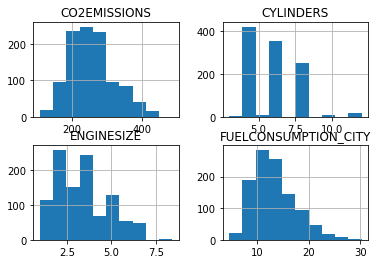

In [13]:
vi = cd[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
vi.hist()
plt.show()

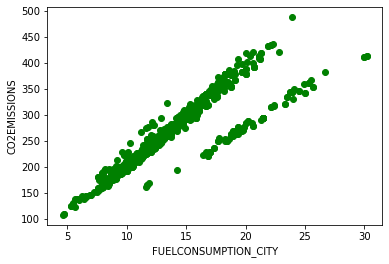

In [14]:
plt.scatter(cd.FUELCONSUMPTION_CITY, cd.CO2EMISSIONS, color = 'green')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [15]:
mask = np.random.rand(len(df))< 0.8
train = cd[mask]
test = cd[~mask]

In [16]:
print(np.random.rand(len(df)))

[0.55895019 0.01719463 0.4900318  ... 0.73657679 0.42330884 0.01004119]


In [17]:
msk = mask < 0.8
print(msk)

[ True  True False ... False  True  True]


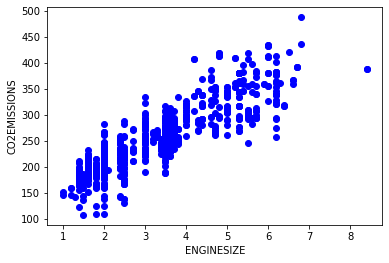

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [ ]:
#using sklearn package to model the data

In [25]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)
print('Coefficients:' ,reg.coef_)
print('Intercept: ',reg.intercept_)


Coefficients: [[39.44794599]]
Intercept:  [124.69239415]


Text(0, 0.5, 'Emissions')

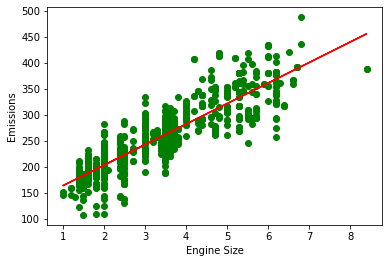

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r' )
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

In [31]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_res = reg.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_res - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_res - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_res , test_y) )


Mean absolute error: 21.94
Residual sum of squares (MSE): 797.63
R2-score: 0.72
